# Finding Lines

In [1]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"
%run -i "Line.py"

# Load Camera calibration params
[warped_images, M_values, Minv_values ] = pickle.load(open( "pickle_data/warped_images_params.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 19746 bytes to 0. Functions_Clases Pipeline.py


###  find_x_lane_line_points

In [2]:
# Test function
currentIndex= 2
warped_image = warped_images[currentIndex]

# Instanciate Line classes
lineLeft = Line()
lineRight = Line()

# Find x line poitns based on histogram values
leftx_base, rightx_base  = find_lane_x_points(warped_image)

lineLeft.updateXbase(leftx_base)
lineRight.updateXbase(rightx_base)

lineLeft.show()
#pprint(vars(lineRight))

{'all_poly_diffs': array([[0, 0, 0]]),
 'allx': None,
 'ally': None,
 'bestx': 409,
 'center_deviation': array([], dtype=float64),
 'currentx': 409,
 'detected': False,
 'list_radius': array([], dtype=float64),
 'missdetections': 0,
 'poly_best_fit': array([], dtype=float64),
 'poly_current_fit': array([], dtype=float64),
 'poly_diffs': array([], dtype=float64),
 'poly_plotx': array([], dtype=float64),
 'poly_plotx_staged': array([], dtype=float64),
 'poly_ploty': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  

###  find_lane_pixels

{'all_poly_diffs': array([[0, 0, 0]]),
 'allx': array([404, 405, 406, ..., 466, 467, 469], dtype=int64),
 'ally': array([576, 576, 576, ..., 719, 719, 719], dtype=int64),
 'bestx': 409,
 'center_deviation': array([], dtype=float64),
 'currentx': 409,
 'detected': False,
 'list_radius': array([], dtype=float64),
 'missdetections': 0,
 'poly_best_fit': array([], dtype=float64),
 'poly_current_fit': array([], dtype=float64),
 'poly_diffs': array([], dtype=float64),
 'poly_plotx': array([], dtype=float64),
 'poly_plotx_staged': array([], dtype=float64),
 'poly_ploty': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64

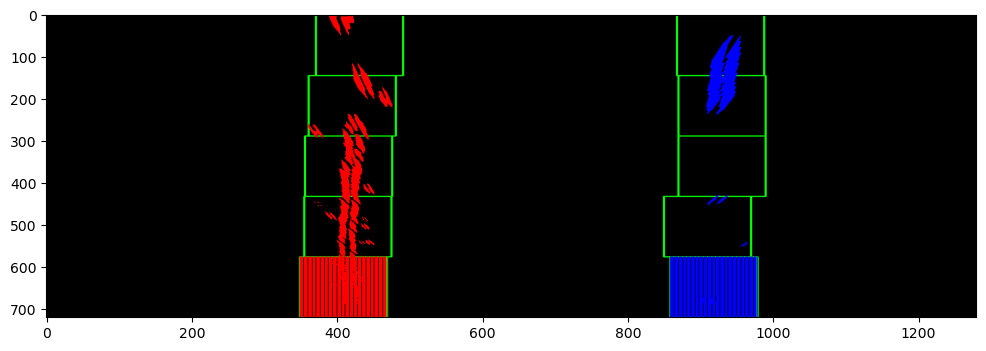

In [3]:
# Test Function
leftx, lefty, rightx, righty, out_img = find_lane_pixels(warped_image,lineLeft.bestx, lineRight.bestx)

lineLeft.updatePixels(leftx, lefty)
lineRight.updatePixels(rightx, righty)

displayListImages([out_img],cols=1,cmap='gray',figSize=[12,4])

pprint(vars(lineLeft))
#pprint(vars(lineRight))

### [function] fit_polynomial

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

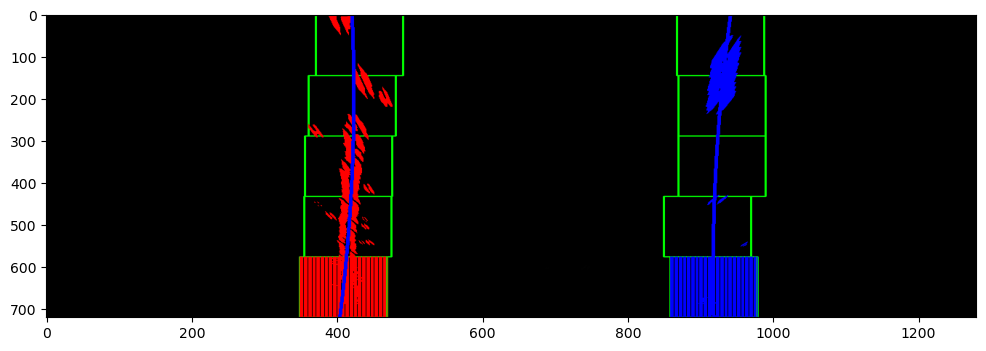

In [4]:
# Test function
coeffs_fit, lineDetected, left_fitx, ploty, img_line  = fit_polynomial(out_img, lineLeft.allx, lineLeft.ally)
lineLeft.updateCoeffsLine(lineDetected, coeffs_fit, left_fitx, ploty)

coeffs_fit, lineDetected, right_fitx, ploty, img_line  = fit_polynomial(out_img, lineRight.allx, lineRight.ally)
lineRight.updateCoeffsLine(lineDetected, coeffs_fit,right_fitx,ploty)

displayListImages([img_line],cols=1,figSize=[12,4])

### [function]rightSeparation

In [5]:
rightSeparation(left_fitx, right_fitx)

True

### [function] areParallel

## Apply to all images

In [6]:
leftLines = []
rightLines = []

for img in warped_images:
    # Instanciate cLine classes
    lineLeft = Line()
    lineRight = Line()

    # Find x line poitns based on histogram values
    leftx_base, rightx_base  = find_lane_x_points(img)

    # Update x base points
    lineLeft.updateXbase(leftx_base)
    lineRight.updateXbase(rightx_base)
    
    
    ## Find lane pixels
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(img, lineLeft.bestx, lineRight.bestx)

    lineLeft.updatePixels(leftx, lefty)
    lineRight.updatePixels(rightx, righty)
    
    
    # Update polynomiasl
    coeffs_fit, lineDetected, left_fitx, ploty, img_line  = fit_polynomial(out_img, lineLeft.allx, lineLeft.ally)
    lineLeft.updateCoeffsLine(lineDetected, coeffs_fit, left_fitx, ploty)

    coeffs_fit, lineDetected, right_fitx, ploty, img_line  = fit_polynomial(out_img, lineRight.allx, lineRight.ally)
    lineRight.updateCoeffsLine(lineDetected, coeffs_fit,right_fitx,ploty)
    
    
    leftLines.append(lineLeft)
    rightLines.append(lineRight)

## Dump data

In [7]:
pickle.dump( [leftLines, rightLines ], open( "pickle_data/lines_lane.p", "wb" ) )